In [79]:
from pyabc import History
import matplotlib.pyplot as plt
import numpy as np
import os
from contagion.config import ConfigClass, _baseconfig
from pyabc.visualization import plot_kde_matrix, plot_kde_1d


In [80]:
db_path = "sqlite:///" + os.path.join("/scratch4/chaack/", "abc.db")
h_loaded = History(db_path)


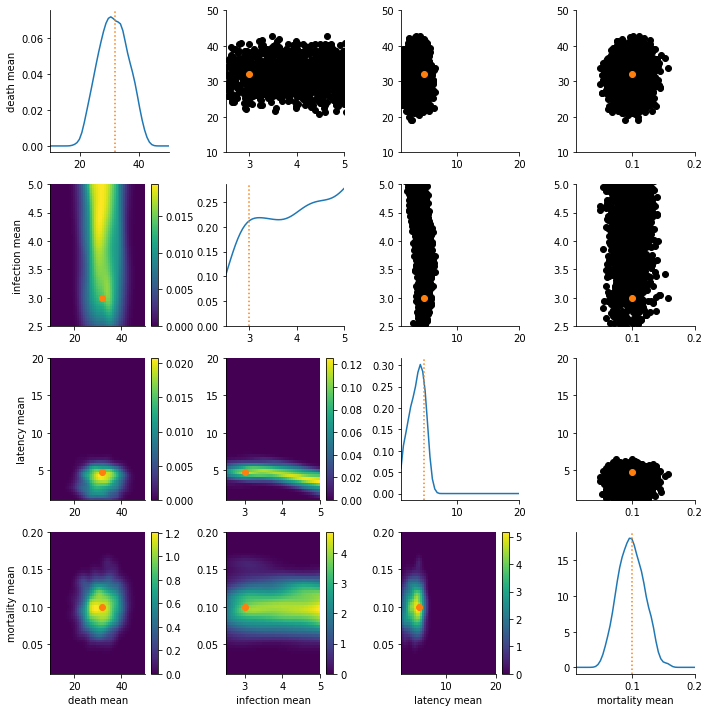

In [81]:
df, w = h_loaded.get_distribution(m=0)

refval = {"latency mean": _baseconfig["infection"]["latency duration pdf"]["mean"],
          "infection mean": _baseconfig["infection"]["infection probability pdf"]["mean"],
          "mortality mean": _baseconfig["infection"]["mortality prob pdf"]["mean"],
          "death mean": _baseconfig["infection"]["time incubation death pdf"]["mean"]
         }

plot_kde_matrix(df, w, refval=refval,
                limits={
                    "latency mean": [1, 20],
                    "infection mean": [2.5, 5],
                    "mortality mean": [0.011, 0.2],
                    "death mean": [10, 50]});


In [ ]:
fig, ax = plt.subplots()
for t in range(0, h_loaded.max_t, 3):
    df, w = h_loaded.get_distribution(m=0, t=t)
    plot_kde_1d(
        df, w,
        xmin=0, xmax=10,
        x="infectious duration mean", ax=ax,
        label="PDF t={}".format(t))
#ax.axvline(data["is_infected"], color="k", linestyle="dashed");
#plt.ylim(0, 0.2)
plt.legend()

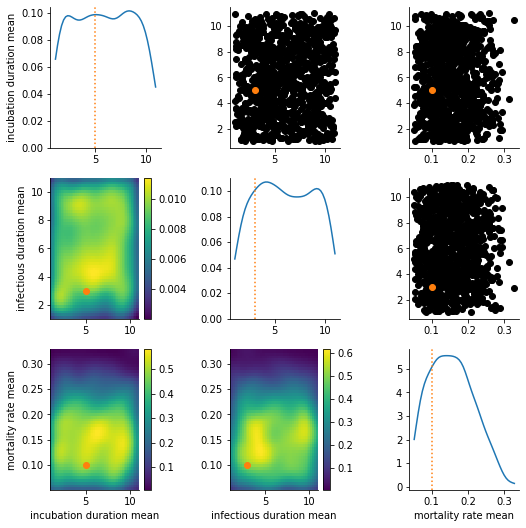

In [66]:
df, w = h_loaded.get_distribution(t=2, m=0)
plot_kde_matrix(df, w, refval=_baseconfig);


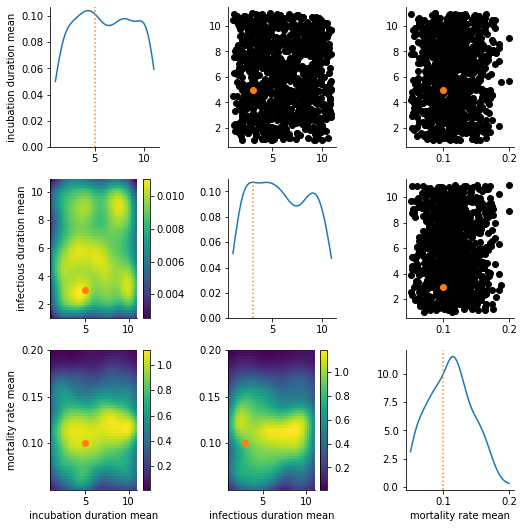

In [67]:
df, w = h_loaded.get_distribution(m=0)
plot_kde_matrix(df, w, refval=_baseconfig);


In [58]:
pyabc.visualization.plot_kde_matrix_highlevel(h_loaded, t=0)
plt.savefig(PICS+"/abc_testrun.png", dpi=150)

NameError: name 'pyabc' is not defined